## Customer Churn

### Projeto do Curso Big Data Real-Time Analytics com Python e Spark

#### Problema de Negócio: Identificar os clientes que podem deixar a empresa

#### Será utilizado o algoritmo Regressão Logística

In [1]:
# Importando Bibliotecas Necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# Importando os dados de treino
df = pd.read_csv("projeto4_telecom_treino.csv", sep = ",", encoding_errors='ignore')

In [3]:
# Mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)

In [4]:
# Primeiras linhas do arquivo
df.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [5]:
# Ultimas linhas do arquivo
df.tail()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
3328,3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3329,3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3330,3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3331,3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no
3332,3333,TN,74,area_code_415,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,no


In [6]:
df.shape

(3333, 21)

In [7]:
df = df.drop_duplicates()

In [8]:
# Substituindo no por 0
df.replace('no',0, inplace = True)


In [9]:
# Substituindo yes por 1
df.replace('yes',1, inplace = True)

In [10]:
# Apagando o texto area_code_ do campo area_code
df.replace({'area_code_':''}, regex = True, inplace = True)

In [11]:
# Excluindo primeira coluna (sequencial)
del df['Unnamed: 0']

In [12]:
# Excluindo a variável state
del df['state']

In [13]:
# Excluindo a variável area_code
# del df['area_code']

In [14]:
df.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [15]:
# Resumo estatístico
df.describe()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [16]:
# Tipos das variáveis
df.dtypes

account_length                     int64
area_code                         object
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [17]:
# Convertendo a variável area_code para int
df['area_code'] = df['area_code'].astype('int')

In [18]:
# Verificando se existe algum registro NA
df.isna().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [19]:
# Verificando se existe algum registro Null
df.isnull().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [20]:
df.shape

(3333, 19)

## Separando a variável churn

In [21]:
# Variável TARGET(churn)
y_treino = df.churn

In [22]:
# Variáveis de Entrada
X_treino = df.drop('churn', axis = 1)

## Analisando a correlação entre as variáveis

In [23]:
corr = X_treino.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_169982/3733241504.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.00,-0.01,0.02,0.00,-0.00,0.01,0.04,0.01,-0.01,0.02,-0.01,-0.01,-0.01,-0.01,0.01,0.02,0.01,-0.00
area_code,-0.01,1.00,0.05,-0.00,-0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.00,-0.01,0.02,-0.01,-0.02,-0.02,-0.02,0.03
international_plan,0.02,0.05,1.00,0.01,0.01,0.05,0.00,0.05,0.02,0.01,0.02,-0.03,0.01,-0.03,0.05,0.02,0.05,-0.02
voice_mail_plan,0.00,-0.00,0.01,1.00,0.96,-0.00,-0.01,-0.00,0.02,-0.01,0.02,0.01,0.02,0.01,-0.00,0.01,-0.00,-0.02
number_vmail_messages,-0.00,-0.00,0.01,0.96,1.00,0.00,-0.01,0.00,0.02,-0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.00,-0.01
total_day_minutes,0.01,-0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01
total_day_calls,0.04,-0.01,0.00,-0.01,-0.01,0.01,1.00,0.01,-0.02,0.01,-0.02,0.02,-0.02,0.02,0.02,0.00,0.02,-0.02
total_day_charge,0.01,-0.01,0.05,-0.00,0.00,1.00,0.01,1.00,0.01,0.02,0.01,0.00,0.02,0.00,-0.01,0.01,-0.01,-0.01
total_eve_minutes,-0.01,0.00,0.02,0.02,0.02,0.01,-0.02,0.01,1.00,-0.01,1.00,-0.01,0.01,-0.01,-0.01,0.00,-0.01,-0.01
total_eve_calls,0.02,-0.01,0.01,-0.01,-0.01,0.02,0.01,0.02,-0.01,1.00,-0.01,-0.00,0.01,-0.00,0.01,0.02,0.01,0.00


In [24]:
# Excluindo colunas com correlação acima de 0.70 e gravando o resultado na variável X
excluir_colunas = ['number_vmail_messages','total_day_minutes','total_eve_charge',
                   'total_night_charge','total_intl_charge']

X_treino.drop(excluir_colunas, axis = 1, inplace = True) 


In [25]:
# Verificando a correlação após a exclusão das colunas
corr = X_treino.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_169982/2815337105.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
account_length,1.00,-0.01,0.02,0.00,0.04,0.01,-0.01,0.02,-0.01,-0.01,0.01,0.02,-0.00
area_code,-0.01,1.00,0.05,-0.00,-0.01,-0.01,0.00,-0.01,-0.01,0.02,-0.02,-0.02,0.03
international_plan,0.02,0.05,1.00,0.01,0.00,0.05,0.02,0.01,-0.03,0.01,0.05,0.02,-0.02
voice_mail_plan,0.00,-0.00,0.01,1.00,-0.01,-0.00,0.02,-0.01,0.01,0.02,-0.00,0.01,-0.02
total_day_calls,0.04,-0.01,0.00,-0.01,1.00,0.01,-0.02,0.01,0.02,-0.02,0.02,0.00,-0.02
total_day_charge,0.01,-0.01,0.05,-0.00,0.01,1.00,0.01,0.02,0.00,0.02,-0.01,0.01,-0.01
total_eve_minutes,-0.01,0.00,0.02,0.02,-0.02,0.01,1.00,-0.01,-0.01,0.01,-0.01,0.00,-0.01
total_eve_calls,0.02,-0.01,0.01,-0.01,0.01,0.02,-0.01,1.00,-0.00,0.01,0.01,0.02,0.00
total_night_minutes,-0.01,-0.01,-0.03,0.01,0.02,0.00,-0.01,-0.00,1.00,0.01,-0.02,-0.01,-0.01
total_night_calls,-0.01,0.02,0.01,0.02,-0.02,0.02,0.01,0.01,0.01,1.00,-0.01,0.00,-0.01


In [26]:
# Shape dos dados após seleção das variáveis
X_treino.shape

(3333, 13)

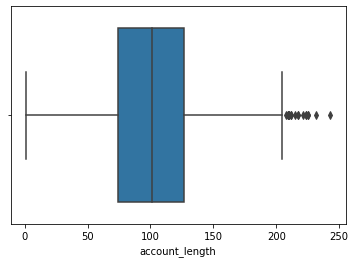

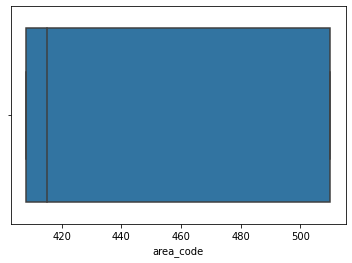

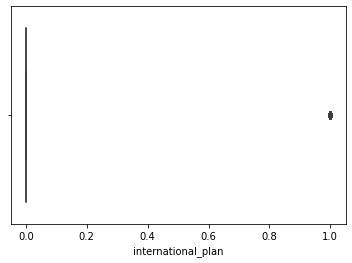

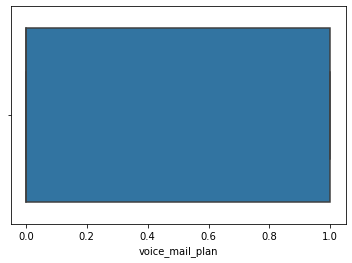

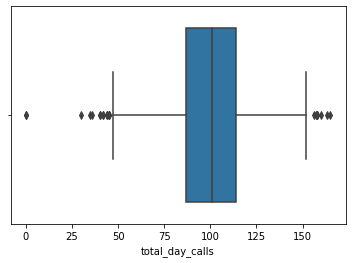

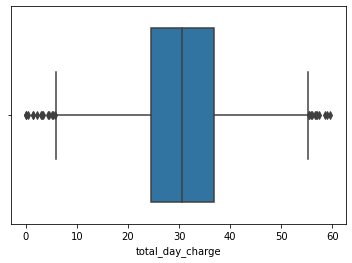

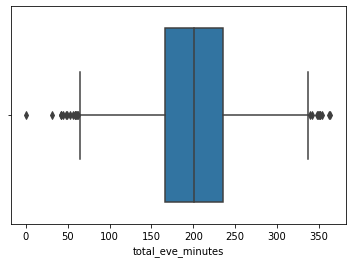

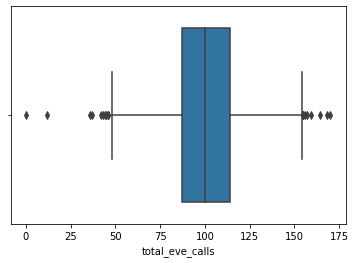

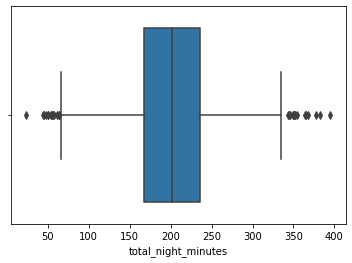

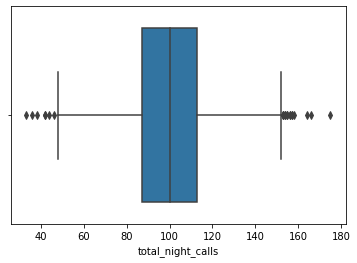

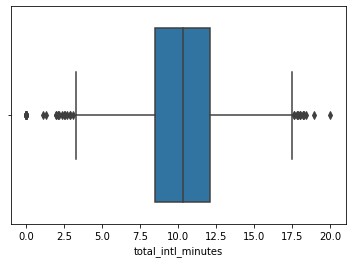

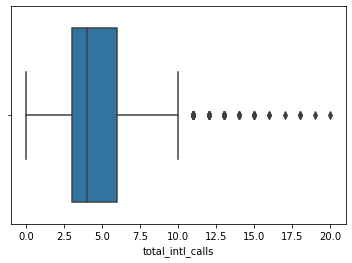

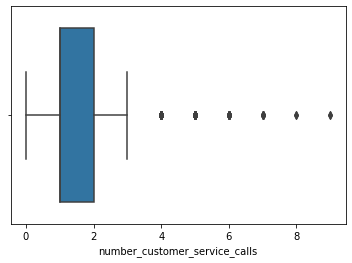

In [27]:
# Gerando o boxplot para cada variável com o seaborn
for coluna in X_treino.columns:
    boxplot = sbn.boxplot(x=X_treino[coluna])
    plt.show()
    

### Balanceamento de Classes

In [28]:
# Verificando a proporção de 0 e 1 nas classes
y_treino.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [29]:
# As classes estão desbalanceadas
# Será necessário utilizar o recurso da biblioteca imblearn para balancear
import imblearn
from imblearn.over_sampling import SMOTE

In [30]:
# Serão criados dados sintéticos para a classe 1
over_sampler = SMOTE(k_neighbors = 5)
X_btreino, y_btreino = over_sampler.fit_resample(X_treino, y_treino)

In [31]:
# Verificando se as classes ficaram balanceadas após o processamento
y_btreino.value_counts()

0    2850
1    2850
Name: churn, dtype: int64

### Normalização dos dados

In [32]:
# A normalização dos dados é um pré requisito para o modelo de regressão logística
# Será utilizado aqui o método StandardScaler da Scikit-Learn
from sklearn.preprocessing import StandardScaler

X_btreino = StandardScaler().fit_transform(X_btreino)

### Algoritmo Regressão Logística

In [33]:
# Lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l2']}

In [34]:
# Buscando os melhores parâmetros
modelo = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1,                        
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [35]:
# Treinamento do modelo
modelo.fit(X_btreino, y_btreino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l2']},
             scoring='roc_auc')

In [36]:
# Melhor modelo
modelo.best_estimator_

LogisticRegression(C=0.01)

### Importando dados de teste

In [37]:
# Importando os dados de teste
df_teste = pd.read_csv("projeto4_telecom_teste.csv", sep = ",", encoding_errors='ignore')

In [38]:
df_teste.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [39]:
# Substituindo no por 0
df_teste.replace('no',0, inplace = True)

In [40]:
# Substituindo yes por 1
df_teste.replace('yes',1, inplace = True)

In [41]:
# Apagando o texto area_code_ do campo area_code
df_teste.replace({'area_code_':''}, regex = True, inplace = True)

In [42]:
# Convertendo a variável area_code para int
df_teste['area_code'] = df_teste['area_code'].astype('int')

In [43]:
# Selecionando as mesmas variáveis utilizadas no treinamento
X_teste = df_teste[X_treino.columns]

In [44]:
# Selecionando a variável target
y_teste = df_teste.churn

In [45]:
X_teste.head()

,account_length,area_code,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls
0,101,510,0,0,123,12.05,211.9,73,236.0,73,10.6,3,3
1,137,510,0,0,86,38.01,244.8,139,94.2,81,9.5,7,0
2,103,408,0,1,95,50.10,237.3,105,300.3,127,13.7,6,1
3,99,415,0,0,123,36.86,126.4,88,220.6,82,15.7,2,1
4,108,415,0,0,78,33.56,124.0,101,204.5,107,7.7,4,2


In [46]:
# Normalizando os dados de teste
X_teste = StandardScaler().fit_transform(X_teste)

### Previsão com os dados de teste

In [47]:
# Previsões com dados de teste
y_pred = modelo.predict(X_teste)

In [48]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba = modelo.predict_proba(X_teste)

In [49]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
y_pred_proba = modelo.predict_proba(X_teste)[:,1]

In [50]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred)

array([[802, 641],
       [ 36, 188]])

In [51]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred).ravel()

In [52]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc = roc_auc_score(y_teste, y_pred)
print(roc_auc)

0.697536135036135


In [53]:
# Calcula a curva ROC com dados e previsões em teste
fpr, tpr, thresholds = roc_curve(y_teste, y_pred_proba)

In [54]:
# AUC em teste
auc_v1 = auc(fpr, tpr)
print(auc_v1)

0.8112532175032175


In [55]:
# Acurácia em teste
acuracia = accuracy_score(y_teste, y_pred)
print(acuracia)

0.593881223755249
